## Retirement Calculator

This Python script uses data from Vanguard Target Retirement Funds to calculate estimated retirement income.

In [47]:
# Libraries
import yfinance as yf
from statistics import mean, stdev
from random import choice
from matplotlib.pyplot import hist, show, xlabel, ylabel, title
from datetime import datetime

Vanguard Target Retirement 2025 Fund (VTTVX) data is used to project income up until retirement. The Vanguard Target Income Fund (VTINX) and Consumer Price Index (CPI) data are used to forecast the balance post-retirement. Vanguard fund data was obtained from the yfinance package, while the CPI was taken from the St. Louis Federal Reserve FRED database.

In [48]:
# Read in VTTVX Vanguard Target 2025 Fund changes November 1, 2003 - June 30, 2023
vttvxdf = yf.download("VTTVX", end=datetime(2023, 6, 30), interval='1mo')
vttvxdf
vttvxdf['pct_change'] = vttvxdf[['Close']].pct_change()
print(len(vttvxdf.iloc[1:]['pct_change']))
print(mean(vttvxdf.iloc[1:]['pct_change']))
print("Average monthly rate of return for VTTVX: "+str(round(mean(vttvxdf.iloc[1:]['pct_change'])*100, 6))+"%")
# print(choice(vttvxdf.iloc[1:]['pct_change']))

# Read in Vanguard Target Income Fund Changes July 1, 2007 - June 30, 2023
vtinxdf = yf.download("VTINX", start=datetime(2007, 7, 1), end=datetime(2023, 6, 30), interval='1mo')
vtinxdf
vtinxdf['pct_change'] = vtinxdf[['Close']].pct_change()
print(mean(vtinxdf.iloc[1:]['pct_change']))
print("Average monthly rate of return for VTINX: "+str(round(mean(vtinxdf.iloc[1:]['pct_change'])*100, 6))+"%")
# print(choice(vtinxdf.iloc[1:]['pct_change']))

# Read in monthly CPI change June 1, 2013 - June 1, 2023 from St. Louis Fed FRED Database
# File stored in Python project directory
inflation=[]
cpichange = open("CPI change.csv", "r")
for line in cpichange:
    rate = line
    rate = float(rate)
    inflation.append(rate)
cpichange.close()
# print(inflation)
print(mean(inflation))
# print(stdev(inflation))
# print(mean(inflation)*1200) #Inflation rate
infl = mean(inflation)
print("Approximate average annual rate of inflation: "+str(round((infl*1200),3))+"%")

[*********************100%***********************]  1 of 1 completed
235
0.002982740187943188
Average monthly rate of return for VTTVX: 0.298274%
[*********************100%***********************]  1 of 1 completed
0.0010613420970397556
Average monthly rate of return for VTINX: 0.106134%
0.0022386277993333334
Approximate average annual rate of inflation: 2.686%


The function producing the pre-retirement rate of return randomly chooses a monthly % change from the VTTVX dataframe. The post-retirement function randomly chooses a monthly % change from VTINX and subtracts a randomly chosen monthly CPI % change.

In [49]:
# Functions
def monthcalc(start, end):
    return (end-start)*12

def prerate():
    # return(float(input("Enter rate of return"))) # manual choice of rate
    return(choice(vttvxdf.iloc[1:]['pct_change'])) # use VTTVX monthly rate change data from 2003-2023

def postratefunc():
    # cpi = float(input("Enter inflation"))/12
    # incomerate = float(input("Enter return rate"))
    cpi = choice(inflation)
    incomerate = choice(vtinxdf.iloc[1:]['pct_change'])
    return(incomerate-cpi)

For the range of months before retirement, update the balance with a monthly rate of return and deposit contribution.

Put the balance into the second loop. The balance is updated with a monthly rate of return that also factors in monthly inflation. 

Withdrawals are calculated by dividing the balance by months of retirement. Months decrease by 1 for each iteration of the loop. This withdrawal calculation assumes no additional savings or investment.

This sequence of building up a balance up to the retirement year and withdrawing during retirement repeats for the number of simulation times.

Enter simulation times 100
Enter starting balance 20000
Enter monthly contribution 500
Enter retirement year 2055


Starting balance is 20000.0
Monthly contribution is 500.0
The current year is 2023
Retirement year is 2055
Your balance at the start of retirement would be: $395604.96.
Your average monthly income would be: $938.38.


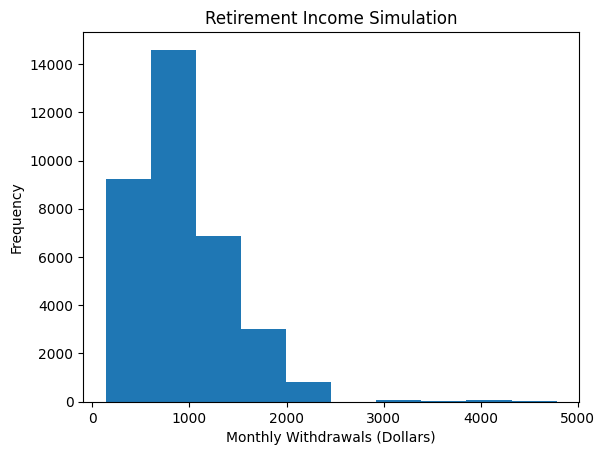

In [51]:
times = int(input("Enter simulation times"))
prebalance = float(input("Enter starting balance"))
contribution = float(input("Enter monthly contribution"))
# startyear = int(input("Current year"))
startyear = datetime.now().year
retyear = int(input("Enter retirement year"))
premonths = monthcalc(startyear,retyear)
print("Starting balance is", prebalance)
print("Monthly contribution is", contribution)
print("The current year is", startyear)
print("Retirement year is", retyear)
# print(premonths)
rate = prerate()
ballist =[]
wdlist=[]
for t in range(times):
    balance = prebalance
    for m in range(1,premonths+1):
        rate = prerate()
        # print(rate)
        balance = balance*(1+rate)+contribution
    ballist.append(balance)
    months = monthcalc(retyear + 1, retyear + 30)
    while months > 0:
        postretrate = postratefunc()
        # print(postretrate)
        withdrawal = balance / months
        wdlist.append(withdrawal)
        balance = (balance*(1+postretrate))-withdrawal
        months -= 1
# print(len(ballist))
# print(round(mean(ballist), 2))
print("Your balance at the start of retirement would be: $"+str(round(mean(ballist), 2))+".")
# print(len(wdlist))
avg = round(mean(wdlist),2)
print("Your average monthly income would be: $"+str(avg)+".")
# print(round(mean(wdlist),2))
hist(wdlist)
title('Retirement Income Simulation')
xlabel('Monthly Withdrawals (Dollars)')
ylabel('Frequency')
show()

Ideas for improvemnt include:
* Use different or more funds/indexes
* Flexibility in retirement years, instead of hard-coding 30 years
* Calculate and project in terms of years and months, not just a duration of years
* Factor some inflation into the pre-retirment calculations, especially further out in the pre-retirement years